In [1]:
import numpy as np
import pandas as pd
import wrangle
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer


In [3]:
df = wrangle.get_zillow()

In [3]:
df.head()

,parcelid,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
0,11544747,3.0,4.0,1620.0,847770.0,2011.0,10244.94,6037.0
1,11585547,3.0,2.0,2077.0,646760.0,1926.0,7924.68,6037.0
2,12716947,3.0,1.0,1244.0,169471.0,1950.0,2532.88,6037.0
3,12757147,3.0,2.0,1300.0,233266.0,1950.0,3110.99,6037.0
4,12757947,3.0,2.0,1222.0,290492.0,1951.0,3870.25,6037.0


In [4]:
# split data into train/validate/test
train, validate, test = wrangle.my_split(df)

In [12]:
# # split into X and y (for use later)
# cols = ['parcelid','bedroomcnt','bathroomcnt','calculatedfinishedsquarefeet',
#         'yearbuilt','taxamount','fips']
# X_train, X_validate, X_test = train[cols], validate[cols], test[cols]
# y_train, y_validate, y_test = train.taxvaluedollarcnt, validate.taxvaluedollarcnt, test.taxvaluedollarcnt

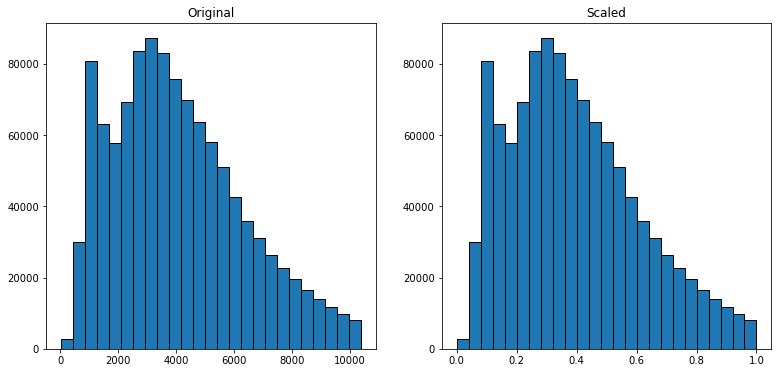

In [20]:
# create Min-Max scaler and scale two columns
scaler = MinMaxScaler()
train[['scaled_sqft', 'scaled_taxamount']] = scaler.fit_transform(train[['calculatedfinishedsquarefeet',
                                                                         'taxamount']])

# plot the original and scaled tax amount
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train.taxamount, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(train.scaled_taxamount, bins=25, ec='black')
plt.title('Scaled')
plt.show()

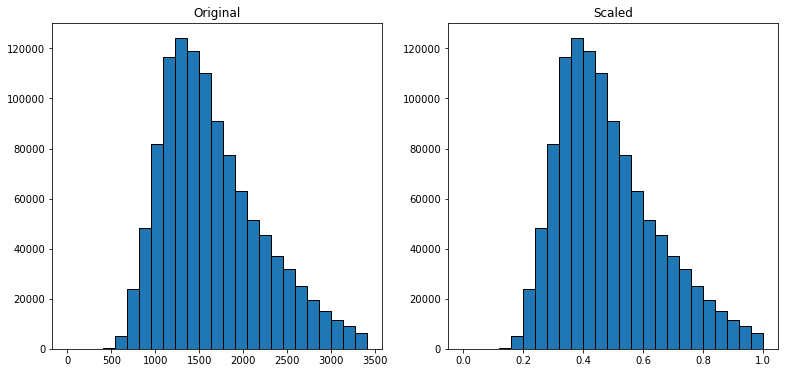

In [19]:
# plot the original and scaled sq ft
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train.calculatedfinishedsquarefeet, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(train.scaled_sqft, bins=25, ec='black')
plt.title('Scaled')
plt.show()

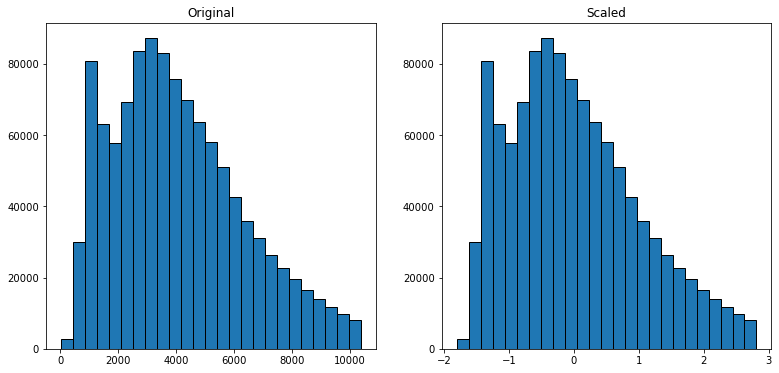

In [49]:
# create Standard scaler and scale two columns
scaler = StandardScaler()
train[['scaled_sqft', 'scaled_taxamount']] = scaler.fit_transform(train[['calculatedfinishedsquarefeet',
                                                                         'taxamount']])

# plot the original and scaled tax amount
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train.taxamount, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(train.scaled_taxamount, bins=25, ec='black')
plt.title('Scaled')
plt.show()

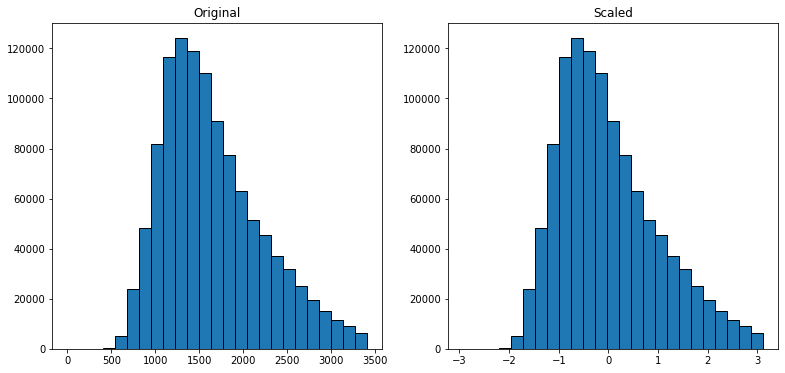

In [23]:
# plot the original and scaled sq ft
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train.calculatedfinishedsquarefeet, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(train.scaled_sqft, bins=25, ec='black')
plt.title('Scaled')
plt.show()

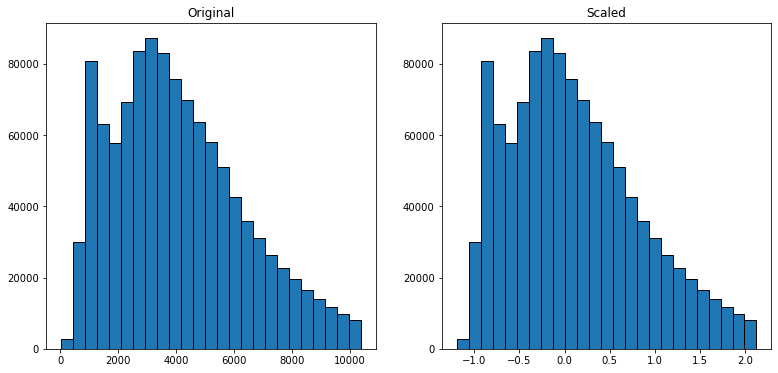

In [24]:
# create Robust scaler and scale two columns
scaler = RobustScaler()
train[['scaled_sqft', 'scaled_taxamount']] = scaler.fit_transform(train[['calculatedfinishedsquarefeet',
                                                                         'taxamount']])

# plot the original and scaled tax amount
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train.taxamount, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(train.scaled_taxamount, bins=25, ec='black')
plt.title('Scaled')
plt.show()

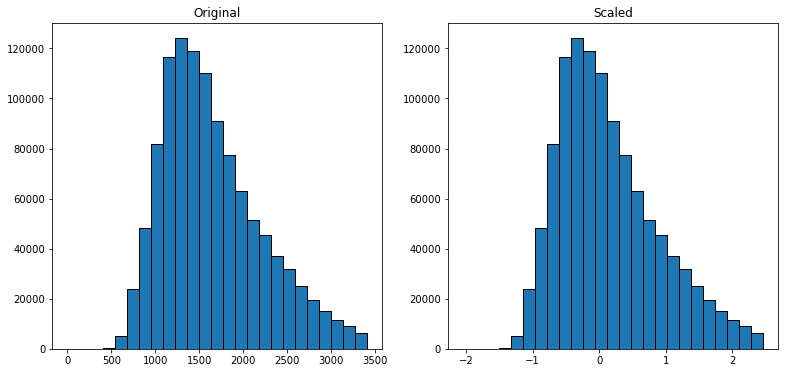

In [25]:
# plot the original and scaled sq ft
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train.calculatedfinishedsquarefeet, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(train.scaled_sqft, bins=25, ec='black')
plt.title('Scaled')
plt.show()

# Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?

In [51]:
train[['orig_sqft', 'orig_taxamount']] = scaler.inverse_transform(train[['scaled_sqft', 'scaled_taxamount']])

In [52]:
train

,parcelid,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips,scaled_sqft,scaled_taxamount,orig_sqft,orig_taxamount
1728554,11869650,3.0,2.0,1656.0,530853.0,1959.0,7850.68,6037.0,0.003487,1.684749,1656.0,7850.68
81629,14072017,3.0,2.5,2328.0,98133.0,1966.0,1386.00,6059.0,1.193322,-1.195713,2328.0,1386.00
1399090,13949953,4.0,3.5,2807.0,347645.0,1959.0,4303.98,6059.0,2.041433,0.104449,2807.0,4303.98
1726159,10778653,3.0,1.0,1022.0,186407.0,1949.0,2270.58,6037.0,-1.119065,-0.801571,1022.0,2270.58
1449518,11265805,3.0,2.0,2459.0,279593.0,1953.0,3473.36,6037.0,1.425268,-0.265650,2459.0,3473.36
...,...,...,...,...,...,...,...,...,...,...,...,...
948,10827255,3.0,3.0,3047.0,400023.0,1925.0,4967.42,6037.0,2.466373,0.400057,3047.0,4967.42
1415305,12500004,3.0,2.0,1742.0,125836.0,1977.0,1662.71,6037.0,0.155758,-1.072419,1742.0,1662.71
1091879,12968478,3.0,2.0,1315.0,70159.0,1950.0,1255.78,6037.0,-0.600283,-1.253735,1315.0,1255.78
1661236,17228826,3.0,2.0,1436.0,335000.0,1974.0,4052.44,6111.0,-0.386042,-0.007630,1436.0,4052.44


In [53]:
train.drop(columns=['scaled_sqft', 'scaled_taxamount', 'orig_sqft', 'orig_taxamount'], inplace=True)

# Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply this scaler to your data. Visualize the result of your data scaling.

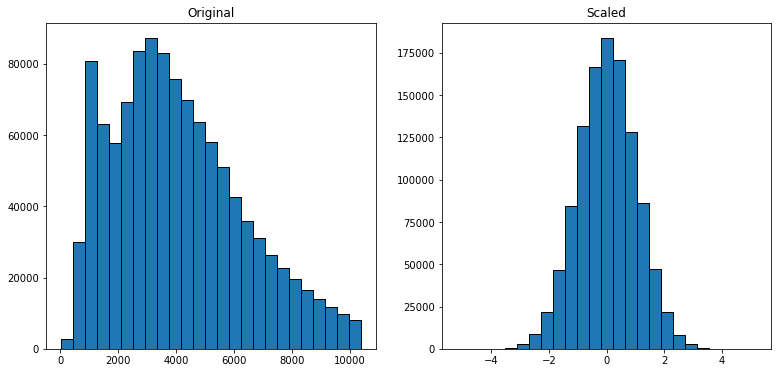

In [55]:
# create quantiletransformer scaler and scale two columns
scaler = QuantileTransformer(output_distribution = 'normal')
train[['scaled_sqft', 'scaled_taxamount']] = scaler.fit_transform(train[['calculatedfinishedsquarefeet',
                                                                         'taxamount']])

# plot the original and scaled tax amount
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train.taxamount, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(train.scaled_taxamount, bins=25, ec='black')
plt.title('Scaled')
plt.show()

# Use the QuantileTransformer, but omit the output_distribution argument. Visualize your results. What do you notice?

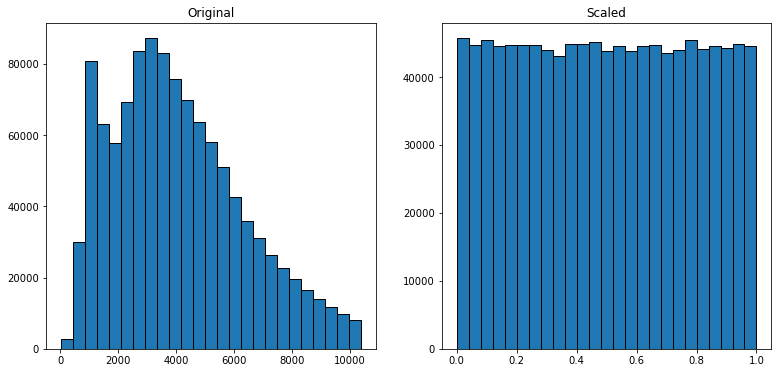

In [56]:
# create quantiletransformer scaler and scale two columns
scaler = QuantileTransformer()
train[['scaled_sqft', 'scaled_taxamount']] = scaler.fit_transform(train[['calculatedfinishedsquarefeet',
                                                                         'taxamount']])

# plot the original and scaled tax amount
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train.taxamount, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(train.scaled_taxamount, bins=25, ec='black')
plt.title('Scaled')
plt.show()

# Based on the work you've done, choose a scaling method for your dataset. Write a function within your prepare.py that accepts as input the train, validate, and test data splits, and returns the scaled versions of each. Be sure to only learn the parameters for scaling from your training data!

In [5]:
train.head()

,parcelid,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
1728554,11869650,3.0,2.0,1656.0,530853.0,1959.0,7850.68,6037.0
81629,14072017,3.0,2.5,2328.0,98133.0,1966.0,1386.00,6059.0
1399090,13949953,4.0,3.5,2807.0,347645.0,1959.0,4303.98,6059.0
1726159,10778653,3.0,1.0,1022.0,186407.0,1949.0,2270.58,6037.0
1449518,11265805,3.0,2.0,2459.0,279593.0,1953.0,3473.36,6037.0


In [ ]:
def scaler(scaler, train, validate, test):
       '''
       function accepts a scaler, and train/validate/test dataframes and 
       performs min_max scaling on the sq_ft and tax_amount columns
       returns the train, validate, and test dataframes with the additional 
       scaled columns
       '''
        train[['scaled_sqft', 'scaled_taxamount']] = scaler.fit_transform(train[['calculatedfinishedsquarefeet',
                                                                         'taxamount']])

        validate[['scaled_sqft', 'scaled_taxamount']] = scaler.transform(train[['calculatedfinishedsquarefeet',
                                                                         'taxamount']])

        test[['scaled_sqft', 'scaled_taxamount']] = scaler.transform(train[['calculatedfinishedsquarefeet',
                                                                         'taxamount']])

        return train, validate, test

In [9]:
# test function
train, validate, test = wrangle.scaler(MinMaxScaler(), train, validate, test)

In [10]:
# verify new columns in place
train.head()

,parcelid,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips,scaled_sqft,scaled_taxamount
1728554,11869650,3.0,2.0,1656.0,530853.0,1959.0,7850.68,6037.0,0.485480,0.756019
81629,14072017,3.0,2.5,2328.0,98133.0,1966.0,1386.00,6059.0,0.682605,0.131862
1399090,13949953,4.0,3.5,2807.0,347645.0,1959.0,4303.98,6059.0,0.823115,0.413590
1726159,10778653,3.0,1.0,1022.0,186407.0,1949.0,2270.58,6037.0,0.299501,0.217268
1449518,11265805,3.0,2.0,2459.0,279593.0,1953.0,3473.36,6037.0,0.721033,0.333394


In [6]:
validate.head()

,parcelid,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips,scaled_sqft,scaled_taxamount
1116247,11586527,3.0,2.0,2284.0,452195.0,1947.0,5724.98,6037.0,0.669698,0.550786
709671,12417301,4.0,2.0,1978.0,342253.0,1964.0,4083.08,6037.0,0.579935,0.392262
1353478,14182645,4.0,2.0,1805.0,485709.0,1964.0,5704.84,6059.0,0.529187,0.548841
1815856,13954016,3.0,1.5,1322.0,357533.0,1958.0,4498.12,6059.0,0.387504,0.432334
1825934,14120886,4.0,2.0,1575.0,434806.0,1955.0,5135.48,6059.0,0.461719,0.493870
